In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from atom import ATOMClassifier

In [5]:
x ,y = load_breast_cancer(return_X_y=True)

In [6]:
atom = ATOMClassifier(x, y , n_jobs = 6 , verbose = 2 , random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 6 cores.

Dataset stats ==================== >>
Shape: (569, 31)
Memory: 141.24 kB
Scaled: False
Outlier values: 167 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   212 (1.0) |   170 (1.0) |    42 (1.0) |
| 1 |   357 (1.7) |   286 (1.7) |    71 (1.7) |



In [7]:
atom.add(StandardScaler())

Adding StandardScaler to the pipeline...
Fitting StandardScaler...


In [8]:
atom.scaled

True

In [9]:
atom.automl(objective = "precision" , max_time =2*60)

Searching for optimal pipeline...
AutoMLSearch will use the holdout set to score and rank pipelines.
Generating pipelines to search over...
8 pipelines ready for search.

*****************************
* Beginning pipeline search *
*****************************

Optimizing for Precision. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Will stop searching for new pipelines after 120 seconds.

Allowed model families: linear_model, linear_model, xgboost, lightgbm, catboost, random_forest, decision_tree, extra_trees



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type': 'scatter',
              'uid': 'e149e980-f7b3-40b6-81e5-4351efb7e79c',
              'x': [],
              'y': []},
             {'marker': {'color': 'gray'},
              'mode': 'markers',
              'name': 'Iter score',
              'type': 'scatter',
              'uid': '402bfc46-451c-4164-95d6-be642fa1c900',
              'x': [],
              'y': []}],
    'layout': {'showlegend': False,
               'template': '...',
               'title': {'text': ('Pipeline Search: Iteration vs.' ... 'ore at current iteration</sub>')},
               'xaxis': {'rangemode': 'tozero', 'title': {'text': 'Iteration'}},
               'yaxis': {'title': {'text': 'Validation Score'}}}
})

Evaluating Baseline Pipeline: Mode Baseline Binary Classification Pipeline
Mode Baseline Binary Classification Pipeline:
	Starting cross validation
	Finished cross validation - mean Precision: 0.000
	Starting holdout set scoring
	Finished holdout set scoring - Precision: 0.000

*****************************
* Evaluating Batch Number 1 *
*****************************

Elastic Net Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Precision: 1.000
	Starting holdout set scoring
	Finished holdout set scoring - Precision: 1.000
Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean Precision: 1.000
	Starting holdout set scoring
	Finished holdout set scoring - Precision: 1.000
XGBoost Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer:
	Starting cr

In [10]:
atom.evalml

In [11]:
atom.branch.status()

Branch: master
 --> Pipeline: 
   --> StandardScaler
   --> LabelEncoder
   --> ReplaceNullableTypes
   --> Imputer
   --> StandardScaler
 --> Models: LR


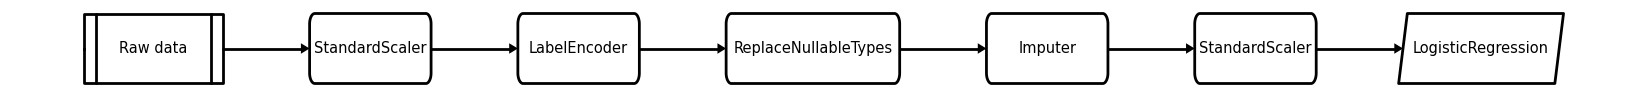

In [12]:
atom.plot_pipeline()

In [13]:
atom.lr

LogisticRegression
 --> Estimator: LogisticRegression
 --> Evaluation: precision: 0.9726

In [14]:
atom.export_pipeline(model = 'lr')

Pipeline(memory=Memory(location=None),
         steps=[('standardscaler', StandardScaler()),
                ('labelencoder', LabelEncoder(positive_label=None)),
                ('replacenullabletypes', ReplaceNullableTypes()),
                ('imputer',
                 Imputer(categorical_impute_strategy='most_frequent', numeric_impute_strategy='most_frequent', boolean_impute_strategy='most_frequent', categorical_fill_value=None, numeric_fill_value=None, boolean_fill_value=None)),
                ('standardscaler2', StandardScaler()),
                ('LR',
                 LogisticRegression(C=5.348794950380701, n_jobs=6,
                                    random_state=1))])